In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
#X is a 2D array, here we have double square brackets
#inner bracket stands for one line of the matrix
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [15]:
#we also have to transform y to a 2D array, where values
#are arranged vertically
#reason: feature scaling 'standardization' expects a unique
#format of X and y
#len(y) stands for the number of rows, that we want to have
#'1' stands for the number of columns, that we want to have
y = y.reshape(len(y), 1)



In [16]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [17]:
#apply feature scaling on features and dependent variable
#reason: in SVR equation, there are no coefficients existing
#in contrast, linear regression models don't need feature scaling (standardization)
#because they have coefficients what can compensate for features with high values
from sklearn.preprocessing import StandardScaler
#StandardScaler will compute mean and standard deviation of data
# z = (x - u) / s
# z --> new value
# x --> current value
# u --> mean of training samples
# s --> standard deviation of training samples

#we also have to scale the dependent variable y
#but with another StandardScaler, cause mean of X is different from mean of y
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [18]:
#newly scaled values for the position levels
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [19]:
#newly scaled values for the salaries
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [21]:
#train SVR model on whole dataset
#we import the class SVR from the module svm
from sklearn.svm import SVR
#'regressor' is an instance of the class SVR
#we can use different kernels (algorithms) for SVR
#here we use the rbf kernel

regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [27]:
#predicting a new result for the position level 6.5
#important: we have to scale the value 6.5 with sc_X
#and we have to reverse y back to the real scale
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

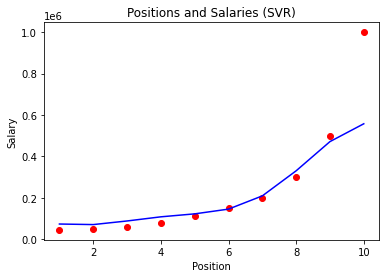

In [48]:
#visualize the SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
#draw a line. on x-axis, there are position levels, 
#on y-axis, we predict salaries with SVR model 
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Positions and Salaries (SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

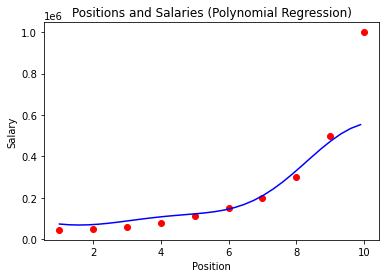

In [49]:
#smoothen the curve by reducing the intervals from 1 to 0.1
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'blue')
plt.title('Positions and Salaries (SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()